# Craigslist Dataset - PCA


In this notebook, we will see how to apply a **PCA**.

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [4]:
df = pd.read_excel("../data/df_cleaned.xlsx")
df.head()

,url,title,seller,price,location,year,makemodel,condition,cylinders,drive,...,GHG Score,Unrounded Highway Mpg For Fuel Type1,ATV Type,Electric motor,Start-Stop,Day,age,date,log_price,state
0,https://seattle.craigslist.org/tac/ctd/d/spana...,2006 Lexus ES 330 Base 4dr Sedan,dealer,6999,+ MC Auto,2006,LEXUSES,NaN,NaN,fwd,...,NaN,NaN,NaN,NaN,NaN,Sunday,19,2025-07-06,8.853665,WA
1,https://sandiego.craigslist.org/nsd/cto/d/san-...,2002 dodge ram 1500 4.7,owner,5800,San marcos,2002,D0DGERAM150047,excellent,8 cylinders,rwd,...,NaN,NaN,NaN,NaN,NaN,Sunday,23,2025-07-06,8.665786,CA
2,https://sfbay.craigslist.org/scz/ctd/d/montere...,2024 Honda Accord Sedan Meteorite Gray **For S...,dealer,27555,NaN,2024,HONDAACCORDSEDANEX,NaN,NaN,fwd,...,6.0,37.0000,NaN,NaN,Y,Sunday,1,2025-07-06,10.223976,CA
3,https://seattle.craigslist.org/sno/cto/d/snoho...,"Nice running commuter, 2003 Honda Accord EX , ...",owner,3500,"Snohomish, Wash",2003,HONDAACCORDEX,NaN,NaN,NaN,...,NaN,0.0000,NaN,NaN,NaN,Sunday,22,2025-07-06,8.160804,WA
4,https://newyork.craigslist.org/que/cto/d/ozone...,Kia Sportage 2011,owner,3100,Ozone Park,2011,KIASPORTAGE,new,NaN,4wd,...,NaN,26.5328,NaN,NaN,N,Sunday,14,2025-07-06,8.039480,NY


## Keep the appropriate columns

This will be based on my **knowledge of the cars** and the **quality of the features** (if a feature has too many `NaN` we may want to replace or delete).

In [6]:
df.columns

Index(['url', 'title', 'seller', 'price', 'location', 'year', 'makemodel',
       'condition', 'cylinders', 'drive', 'fuel', 'odometer', 'paint_color',
       'title_status', 'transmission', 'type', 'posted_at', 'region',
       'make_mapped', 'makemodel_withoutmake', 'specific_model', 'model',
       'Year', 'Engine displacement', 'Fuel Type1', 'Transmission',
       'Vehicle Size Class', 'Unrounded Combined Mpg For Fuel Type1',
       'Annual Fuel Cost For Fuel Type1', 'GHG Score',
       'Unrounded Highway Mpg For Fuel Type1', 'ATV Type', 'Electric motor',
       'Start-Stop', 'Day', 'age', 'date', 'log_price', 'state'],
      dtype='object')

In [7]:
col = ['make_mapped','seller', 'year', 'odometer', 'fuel', 'cylinders', 'drive','transmission', 'type','Vehicle Size Class']

In [8]:
df_filtered = df[col].dropna()
print(f"Total listings with NA: {len(df) - len(df_filtered)}\nTotal listings kept: {len(df_filtered)}")

Total listings with NA: 45644
Total listings kept: 29849


## Encoding

In [10]:
df_encoded = pd.get_dummies(df_filtered, columns=['fuel','seller', 'cylinders', 'drive','transmission', 'type','Vehicle Size Class'])

## Group by Make

In [12]:
df_grouped = df_encoded.groupby('make_mapped').mean()

## Standardize 

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_grouped)

## PCA

Here we apply a **PCA  with 2 principal components** **`PC1`** and **`PC2`**.

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Clustering

Let's use kmeans and select the number of clusters.

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

C:\Users\Mohamed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# DataViz

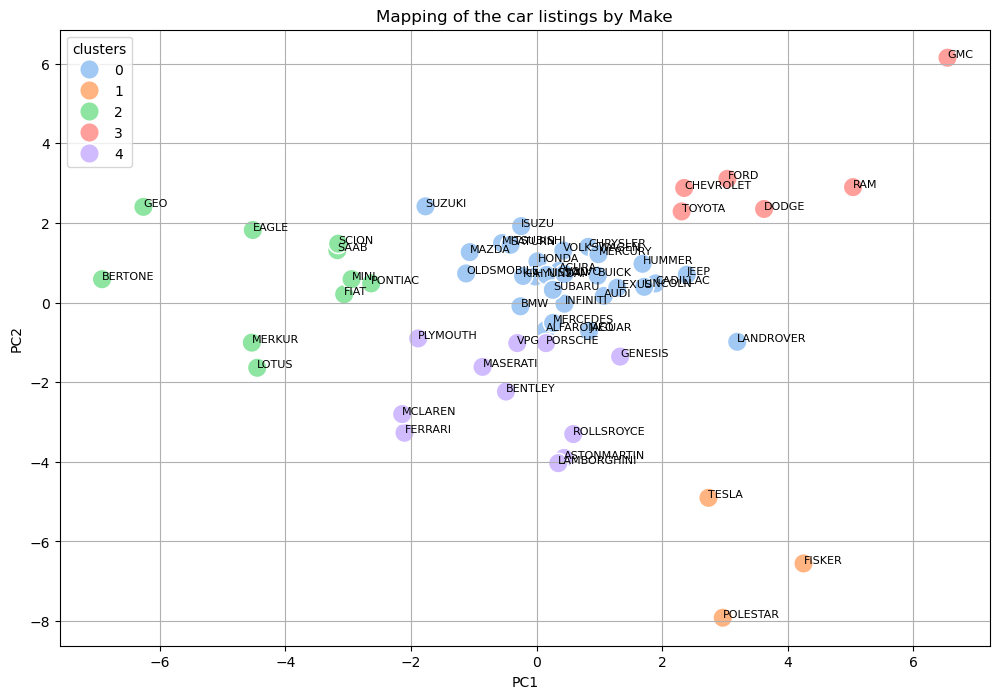

In [20]:
df_visu = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_visu['make'] = df_grouped.index
df_visu['clusters'] = clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_visu, x='PC1', y='PC2', hue='clusters', palette='pastel', s=200)

for i in range(df_visu.shape[0]):
    plt.text(df_visu['PC1'][i], df_visu['PC2'][i], df_visu['make'][i], fontsize=8)

plt.title('Mapping of the car listings by Make')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()